## Library Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
import tsfel
import pickle

In [5]:
activity = {
    1: "WALKING",
    2: "WALKING UPSTAIRS",
    3: "WALKING DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

## Sampler

In [6]:
def sampler(df):
    df_freq = df.iloc[::2]
    df_final = df_freq[100:600]
    return df_final

In [7]:
directory = "DataFiles"
sampled_dfs = []

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep=",")
        df_sampled = sampler(df.iloc[:, 1:4])
        sampled_dfs.append(df_sampled)

In [8]:
X_test = np.stack(sampled_dfs, axis=0)
y_test = np.array([6, 6, 6, 4, 4, 4, 5, 5, 5, 1, 1, 1, 3, 3, 3, 2, 2, 2])
print(X_test.shape)

(18, 500, 3)


## Import Models

In [9]:
with open('raw.pkl', 'rb') as f:
    raw_model = pickle.load(f)

In [10]:
with open('tsfel.pkl', 'rb') as f:
    tsfel_model = pickle.load(f)

In [11]:
with open('feature.pkl', 'rb') as f:
    feature_model = pickle.load(f)

## Q1

Accuracy: 0.17
Precision: 0.06
Recall: 0.17


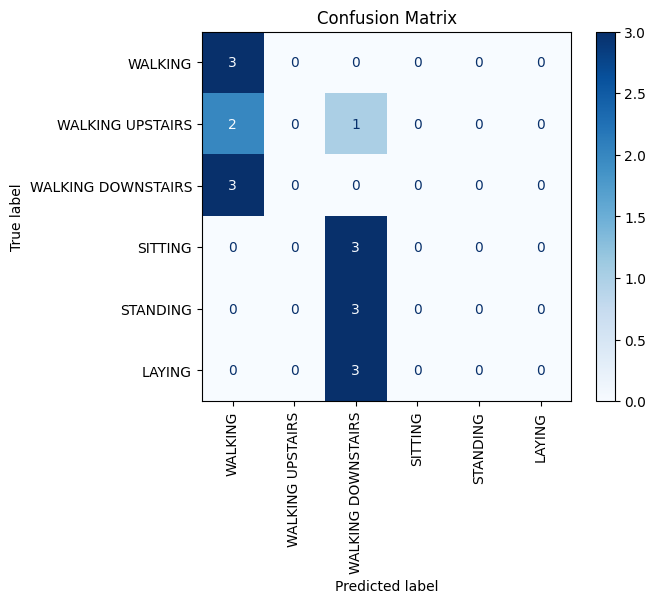

In [12]:
X_test_total_acc = np.sum(X_test**2, axis=2)
y_pred = raw_model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [13]:
cfg = tsfel.get_features_by_domain()

X_test_total_acc = np.sum(X_test**2, axis=2)
X_tsfel_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
X_tsfel_test = np.vstack(X_tsfel_test)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Accuracy: 0.22
Precision: 0.20
Recall: 0.22


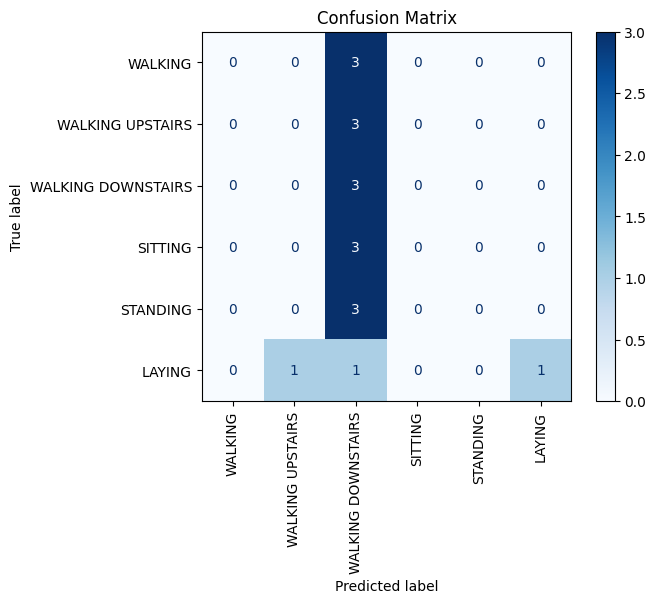

In [14]:
y_pred = tsfel_model.predict(X_tsfel_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [65]:
X_train_df = pd.read_csv('featurized_data_test.csv', sep=",")
y_train_df = pd.read_csv('featurized_labels_test.csv', sep=",")
y_train_df = y_train_df.iloc[:, 1].astype(int)
print(X_train_df)
print(y_train_df)

      Unnamed: 0  tBodyAccX_mean  tBodyAccX_std  tBodyAccY_mean  \
0              0        1.386823       0.564174       -0.136966   
1              1        1.034707       0.483171       -0.026015   
2              2        0.792541       0.845928       -0.122928   
3              3       -0.537236       1.581013       -1.038922   
4              4       -0.514460       1.670706       -1.580179   
...          ...             ...            ...             ...   
9037        9037        0.182671       0.156794       -0.070582   
9038        9038        0.121354       0.091298       -0.019245   
9039        9039        0.193380       0.137336        0.070049   
9040        9040        0.285293       0.114467        0.081015   
9041        9041        0.127326       0.330196        0.224173   

      tBodyAccY_std  tBodyAccZ_mean  tBodyAccZ_std  
0          0.723139       -0.328410       0.479518  
1          0.763919       -0.329931       0.472709  
2          0.931601       -0.499278 

Accuracy: 0.24
Precision: 0.06
Recall: 0.24


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


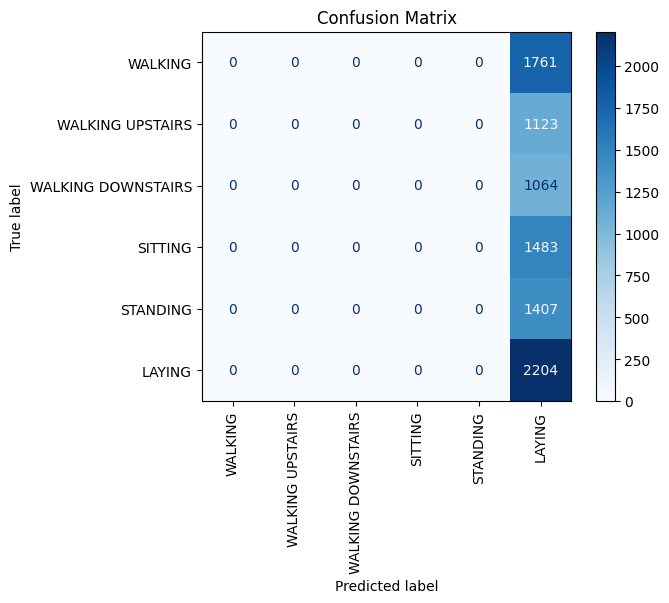

In [66]:
X_feature_test = np.pad(X_train_df, ((0, 0), (0, 561 - X_train_df.shape[1])), mode='constant')

y_pred = feature_model.predict(X_feature_test)

accuracy = accuracy_score(y_train_df, y_pred)
precision = precision_score(y_train_df, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_train_df, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_train_df, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

The models performed poorly on the collected data. Some reasons could be:
1. The datapoints have been collected only for linear accelerometer so it could be missing data of other importatnt features like gyroscope.
2. The datapoints have not been preproccessed, and featurised leading to misleading figures and results.

Thus, the model cannot differentiate between Static and Dynamic activities, and there is a large overlap between them.

## Q2

In [16]:
scaler = StandardScaler()
for i in range(X_test.shape[0]):
    X_test[i] = scaler.fit_transform(X_test[i])

Accuracy: 0.17
Precision: 0.08
Recall: 0.17


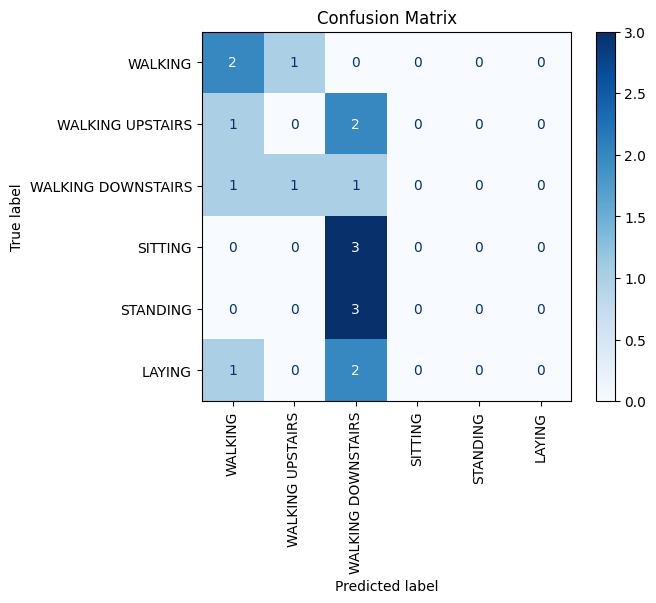

In [17]:
X_test_total_acc = np.sum(X_test**2, axis=2)
y_pred = raw_model.predict(X_test_total_acc)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In [18]:
cfg = tsfel.get_features_by_domain()

X_test_total_acc = np.sum(X_test**2, axis=2)
X_tsfel_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
X_tsfel_test = np.vstack(X_tsfel_test)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


Accuracy: 0.17
Precision: 0.03
Recall: 0.17


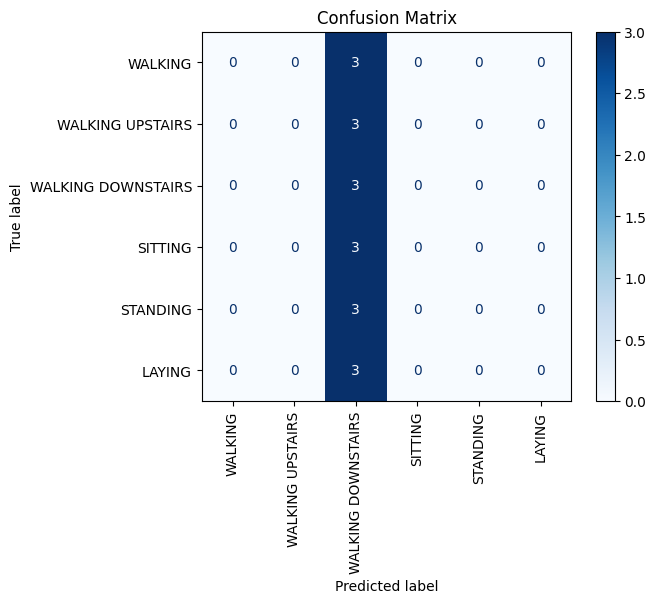

In [19]:
y_pred = tsfel_model.predict(X_tsfel_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.28
Precision: 0.14
Recall: 0.28


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


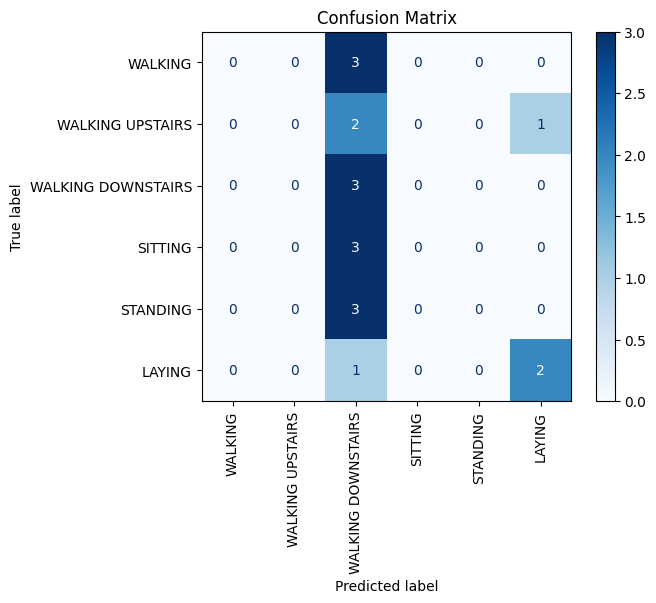

In [20]:
X_feature_test = np.pad(X_tsfel_test, ((0, 0), (0, 561 - X_tsfel_test.shape[1])), mode='constant')

y_pred = feature_model.predict(X_feature_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=activity.values())
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

After preprocessing the model performance of the raw data model improved, as it could now differentiate between Static and Dynamic activities with slight overlaps, but the TSFEL model continued to perform badly.

The featurised model works the best in both cases due to its large training data. However the data input also needs to be fetaurised, in which case since Gyroscope data was not collected, the number of features differ and we were not able to featurise the data properly.

## Q3

The accuracy of the few-shot model is around 5%, which is notably low. However, due to the small size of the test data, this result may not provide a reliable measure of the model's true performance.

In [21]:
%run MakeDataset.py

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [22]:
import os
from langchain_groq.chat_models import ChatGroq
from langchain_core.prompts import FewShotPromptTemplate,PromptTemplate


from dotenv import load_dotenv
load_dotenv()

Groq_Token = os.getenv("GROQ_API_KEY") # Do not share this key with anyone

groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}

In [23]:
from MakeDataset import X_train,y_train

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [24]:
y_train.shape

(126,)

In [25]:
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}
y_train_mapping = np.vectorize(ACTIVITIES.get)(y_train)

In [26]:
y_train_mapping=pd.DataFrame(y_train_mapping)

In [27]:
y_train_mapping[0]

0      WALKING_UPSTAIRS
1                LAYING
2              STANDING
3      WALKING_UPSTAIRS
4      WALKING_UPSTAIRS
             ...       
121             WALKING
122             SITTING
123              LAYING
124    WALKING_UPSTAIRS
125    WALKING_UPSTAIRS
Name: 0, Length: 126, dtype: object

In [28]:
X_train_total_acc = np.sum(X_train**2, axis=2)
print(X_train_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel = []
feature_names = []
for i in range(X_train_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_train_total_acc[i], fs=50)
    X_tsfel.append(X_tsf.values)
    if feature_names == []:
        feature_names = X_tsf.columns.tolist()
X_tsfel = np.vstack(X_tsfel)

(126, 500)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [29]:
X_test_total_acc = np.sum(X_test**2, axis=2)
print(X_test_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel_test = []
feature_names_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
    if feature_names_test == []:
        feature_names_test = X_tsf.columns.tolist()
X_tsfel_test = np.vstack(X_tsfel_test)

(54, 500)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [30]:
X_tsfel_test.shape

(54, 384)

In [31]:
import random
def create_few_shot_examples():

    unique_values = y_train_mapping[0].unique()
    results=[]
    # Iterate through each unique value
    for value in unique_values:
        # Get the indexes and values for the current unique value
        value_indexes = y_train_mapping.index[y_train_mapping[0]== value].tolist()
        value_values = y_train_mapping[0][y_train_mapping[0] == value].tolist()
        
        # Take only the first 5 indexes and values
        value_indexes = value_indexes[:5]
        value_values = value_values[:5]
        
        # Store the results as a tuple (value, indexes, values)
        results.append((value, value_indexes, value_values))

    # Print the results
    for result in results:
        value, indexes, values = result
        print(f"Value: {value}, Indexes: {indexes}, Values: {values}")
    few_shot_examples = []
    for i in range(5):
        for n in results[i][1]:
            example = {
                "query": ','.join(X_tsfel[n][-38:-10].astype(str)),  
                "answer": y_train_mapping[0].iloc[n] 
            }
            few_shot_examples.append(example)
    random.shuffle(few_shot_examples)
    return few_shot_examples


In [32]:
few_shot_examples=create_few_shot_examples()
test_predictions=[]
model_name="llama3-70b"
features_string=','.join((feature_names[-38:-10]))
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
system_prompt = f"""
    * You are a classifier. 
    * Your task is to classify human activities based on the featurized accelerometer data. 
    * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
    * Answer only in one word.
    * The features provided are in the following order seperated by a comma :
    {features_string}
""" 
example_prompt = PromptTemplate(
    input_variables=["query", "answer"], template="Question: {query}\n{answer}"
)

few_shot_prompt = FewShotPromptTemplate(
    examples=few_shot_examples,
    example_prompt=example_prompt,
    prefix=system_prompt,
    suffix="Based on these examples, classify the following activity:\n Question :{sentence}",
    input_variables=['sentence']
)

Value: WALKING_UPSTAIRS, Indexes: [0, 3, 4, 5, 15], Values: ['WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS']
Value: LAYING, Indexes: [1, 14, 23, 27, 35], Values: ['LAYING', 'LAYING', 'LAYING', 'LAYING', 'LAYING']
Value: STANDING, Indexes: [2, 8, 22, 24, 29], Values: ['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING']
Value: WALKING, Indexes: [6, 7, 10, 12, 13], Values: ['WALKING', 'WALKING', 'WALKING', 'WALKING', 'WALKING']
Value: SITTING, Indexes: [9, 11, 19, 28, 36], Values: ['SITTING', 'SITTING', 'SITTING', 'SITTING', 'SITTING']
Value: WALKING_DOWNSTAIRS, Indexes: [16, 20, 21, 26, 37], Values: ['WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS', 'WALKING_DOWNSTAIRS']


In [33]:
for i, data in enumerate(X_tsfel_test):
    sentence = ",".join(X_tsfel_test[i][-38:-10].astype(str))
    prompt = few_shot_prompt.format(sentence=sentence)
    ans = llm.invoke(prompt)
    print(i,ans.content)
    test_predictions.append(ans.content)

0 WALKING_UPSTAIRS
1 WALKING_UPSTAIRS
2 WALKING_UPSTAIRS
3 STANDING
4 STANDING
5 WALKING_UPSTAIRS
6 WALKING_UPSTAIRS
7 STANDING
8 WALKING_UPSTAIRS
9 LAYING
10 LAYING
11 STANDING
12 STANDING
13 STANDING
14 LAYING
15 WALKING
16 LAYING
17 STANDING
18 WALKING_UPSTAIRS
19 STANDING
20 STANDING
21 WALKING_UPSTAIRS
22 WALKING_UPSTAIRS
23 WALKING_UPSTAIRS
24 WALKING
25 LAYING
26 SITTING
27 LAYING
28 WALKING_UPSTAIRS
29 WALKING
30 LAYING
31 WALKING
32 LAYING
33 LAYING
34 WALKING_UPSTAIRS
35 LAYING
36 LAYING
37 WALKING_UPSTAIRS
38 WALKING_UPSTAIRS
39 WALKING
40 WALKING_UPSTAIRS
41 WALKING_UPSTAIRS
42 WALKING_UPSTAIRS
43 SITTING
44 STANDING
45 STANDING
46 STANDING
47 WALKING_UPSTAIRS
48 WALKING_UPSTAIRS
49 WALKING_UPSTAIRS
50 WALKING_UPSTAIRS
51 LAYING
52 WALKING
53 LAYING


In [34]:
pred=pd.DataFrame(test_predictions)
pred.to_csv(f"few_shot_{model_name}_collected_data.csv")

In [35]:
f_s1=pd.read_csv("few_shot_llama3-70b_collected_data.csv")
f_s1['0']

0     WALKING_UPSTAIRS
1     WALKING_UPSTAIRS
2     WALKING_UPSTAIRS
3             STANDING
4             STANDING
5     WALKING_UPSTAIRS
6     WALKING_UPSTAIRS
7             STANDING
8     WALKING_UPSTAIRS
9               LAYING
10              LAYING
11            STANDING
12            STANDING
13            STANDING
14              LAYING
15             WALKING
16              LAYING
17            STANDING
18    WALKING_UPSTAIRS
19            STANDING
20            STANDING
21    WALKING_UPSTAIRS
22    WALKING_UPSTAIRS
23    WALKING_UPSTAIRS
24             WALKING
25              LAYING
26             SITTING
27              LAYING
28    WALKING_UPSTAIRS
29             WALKING
30              LAYING
31             WALKING
32              LAYING
33              LAYING
34    WALKING_UPSTAIRS
35              LAYING
36              LAYING
37    WALKING_UPSTAIRS
38    WALKING_UPSTAIRS
39             WALKING
40    WALKING_UPSTAIRS
41    WALKING_UPSTAIRS
42    WALKING_UPSTAIRS
43         

In [36]:
y_test=pd.DataFrame(y_test)

In [37]:
y_test_mapping=y_test[0].map(ACTIVITIES)

In [38]:
matches=(f_s1['0']==y_test_mapping).sum()
print(matches)
accuracy = matches.sum() / len(f_s1)
recall=recall_score(y_test_mapping,f_s1['0'],average='macro')
precision=precision_score(y_test_mapping,f_s1['0'],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

23
Accuracy: 42.59%
Recall: 0.43
Precision: 0.38


c:\Users\aashm\OneDrive\Desktop\ES335_gradient_thinkers\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
y_test_mapping

0     WALKING_DOWNSTAIRS
1                WALKING
2       WALKING_UPSTAIRS
3               STANDING
4               STANDING
5                WALKING
6                WALKING
7               STANDING
8     WALKING_DOWNSTAIRS
9       WALKING_UPSTAIRS
10                LAYING
11              STANDING
12                LAYING
13              STANDING
14                LAYING
15               WALKING
16                LAYING
17              STANDING
18      WALKING_UPSTAIRS
19              STANDING
20               SITTING
21    WALKING_DOWNSTAIRS
22      WALKING_UPSTAIRS
23      WALKING_UPSTAIRS
24               WALKING
25               SITTING
26                LAYING
27               SITTING
28               WALKING
29      WALKING_UPSTAIRS
30                LAYING
31      WALKING_UPSTAIRS
32               SITTING
33               SITTING
34    WALKING_DOWNSTAIRS
35                LAYING
36                LAYING
37    WALKING_DOWNSTAIRS
38               WALKING
39              STANDING


## Q4

The accuracy of the model is approximately 27%, which is better than the accuracy achieved on the UCI HAR dataset. However, considering the small size of the test data, this result may not be sufficient to accurately assess the model's efficiency.

In [40]:
def sampler(df,a, b):
    df_freq = df.iloc[::2]
    df_final = df_freq[a:b]
    return df_final

In [41]:
directory = "DataFiles"
sampled_dfs = []
train=[]
test=[]

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        print(filename[:-6])
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path, sep=",")
        df_sampled = sampler(df.iloc[:, 1:4],100,500)
        print(len(df))
        test.append(filename[:-6])
        t=sampler(df.iloc[:,1:4],0,100)
        print(len(t),len(df_sampled))
        sampled_dfs.append(df_sampled)
        train.append(t)

Laying
3493
100 400
Laying
3645
100 400
Laying
3895
100 400
Sitting
2554
100 400
Sitting
2346
100 400
Sitting
2527
100 400
Standing
2537
100 400
Standing
2265
100 400
Standing
2246
100 400
Walking
2841
100 400
Walking
3060
100 400
Walking
2915
100 400
Walking_Downstairs
1671
100 400
Walking_Downstairs
1799
100 400
Walking_Downstairs
1860
100 400
Walking_Upstairs
1680
100 400
Walking_Upstairs
1899
100 400
Walking_Upstairs
2047
100 400


In [42]:
X_train=np.stack(train,axis=0)
y_train=np.array(test)
X_test = np.stack(sampled_dfs, axis=0)
y_test = np.array([6, 6, 6, 4, 4, 4, 5, 5, 5, 1, 1, 1, 3, 3, 3, 2, 2, 2])
print(X_test.shape)

(18, 400, 3)


In [43]:
y_train_mapping=pd.DataFrame(y_train)

In [44]:
y_train_mapping[0]

0                 Laying
1                 Laying
2                 Laying
3                Sitting
4                Sitting
5                Sitting
6               Standing
7               Standing
8               Standing
9                Walking
10               Walking
11               Walking
12    Walking_Downstairs
13    Walking_Downstairs
14    Walking_Downstairs
15      Walking_Upstairs
16      Walking_Upstairs
17      Walking_Upstairs
Name: 0, dtype: object

In [45]:
X_train_total_acc = np.sum(X_train**2, axis=2)
print(X_train_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel = []
feature_names = []
for i in range(X_train_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_train_total_acc[i], fs=50)
    X_tsfel.append(X_tsf.values)
    if feature_names == []:
        feature_names = X_tsf.columns.tolist()
X_tsfel = np.vstack(X_tsfel)

(18, 100)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [46]:
X_test_total_acc = np.sum(X_test**2, axis=2)
print(X_test_total_acc.shape)
cfg = tsfel.get_features_by_domain()
# X_tsfel = tsfel.time_series_features_extractor(cfg, X_train, fs=50)
X_tsfel_test = []
feature_names_test = []
for i in range(X_test_total_acc.shape[0]):
    X_tsf = tsfel.time_series_features_extractor(cfg, X_test_total_acc[i], fs=50)
    X_tsfel_test.append(X_tsf.values)
    if feature_names_test == []:
        feature_names_test = X_tsf.columns.tolist()
X_tsfel_test = np.vstack(X_tsfel_test)

(18, 400)
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [47]:
X_tsfel_test.shape

(18, 334)

In [48]:
def create_few_shot_examples():

    unique_values = y_train_mapping[0].unique()
    results=[]
    # Iterate through each unique value
    for value in unique_values:
        # Get the indexes and values for the current unique value
        value_indexes = y_train_mapping.index[y_train_mapping[0]== value].tolist()
        value_values = y_train_mapping[0][y_train_mapping[0] == value].tolist()
        
        # Take only the first 5 indexes and values
        value_indexes = value_indexes[:5]
        value_values = value_values[:5]
        
        # Store the results as a tuple (value, indexes, values)
        results.append((value, value_indexes, value_values))

    # Print the results
    for result in results:
        value, indexes, values = result
        print(f"Value: {value}, Indexes: {indexes}, Values: {values}")
    few_shot_examples = []
    for i in range(5):
        for n in results[i][1]:
            example = {
                "query": ','.join(X_tsfel[n][-38:-10].astype(str)),  
                "answer": y_train_mapping[0].iloc[n] 
            }
            few_shot_examples.append(example)
    random.shuffle(few_shot_examples)
    return few_shot_examples


In [49]:
few_shot_examples=create_few_shot_examples()
test_predictions=[]
model_name="llama3-70b"
features_string=','.join((feature_names[-38:-10]))
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
system_prompt = f"""
    * You are a classifier. 
    * Your task is to classify human activities based on the featurized accelerometer data. 
    * The activities are WALKING,WALKING_UPSTAIRS,WALKING_DOWNSTAIRS,SITTING,STANDING and LAYING.
    * Answer only in one word.
    * The features provided are in the following order seperated by a comma :
    {features_string}
""" 
example_prompt = PromptTemplate(
    input_variables=["query", "answer"], template="Question: {query}\n{answer}"
)

few_shot_prompt = FewShotPromptTemplate(
    examples=few_shot_examples,
    example_prompt=example_prompt,
    prefix=system_prompt,
    suffix="Based on these examples, classify the following activity:\n Question :{sentence}",
    input_variables=['sentence']
)





Value: Laying, Indexes: [0, 1, 2], Values: ['Laying', 'Laying', 'Laying']
Value: Sitting, Indexes: [3, 4, 5], Values: ['Sitting', 'Sitting', 'Sitting']
Value: Standing, Indexes: [6, 7, 8], Values: ['Standing', 'Standing', 'Standing']
Value: Walking, Indexes: [9, 10, 11], Values: ['Walking', 'Walking', 'Walking']
Value: Walking_Downstairs, Indexes: [12, 13, 14], Values: ['Walking_Downstairs', 'Walking_Downstairs', 'Walking_Downstairs']
Value: Walking_Upstairs, Indexes: [15, 16, 17], Values: ['Walking_Upstairs', 'Walking_Upstairs', 'Walking_Upstairs']


In [50]:
for i in range(13,len(X_tsfel_test)):
    sentence = ",".join(X_tsfel_test[i][-38:-10].astype(str))
    prompt = few_shot_prompt.format(sentence=sentence)
    ans = llm.invoke(prompt)
    print(i,ans.content)
    test_predictions.append(ans.content)

13 Walking
14 Walking
15 Walking
16 Walking_Downstairs
17 Laying


In [51]:
len(test_predictions)

5

In [52]:
pred=pd.DataFrame(test_predictions)
pred.to_csv(f"few_shot_{model_name}_collected_data_1.csv")

In [53]:
f_s2=pd.read_csv("few_shot_llama3-70b_collected_data_1.csv")
f_s2['0']

0               Walking
1               Walking
2               Walking
3    Walking_Downstairs
4                Laying
Name: 0, dtype: object

In [54]:
ACTIVITIES = {
    1: 'Walking'            ,
    2: 'Walking_Upstairs'   ,
    3: 'Walking_Downstairs' ,
    4: 'Sitting'            ,
    5: 'Standing'           ,
    6: 'Laying'             ,
}
y_test=pd.DataFrame(y_test)
y_test_mapping=y_test[0].map(ACTIVITIES)

In [55]:
y_test_mapping

0                 Laying
1                 Laying
2                 Laying
3                Sitting
4                Sitting
5                Sitting
6               Standing
7               Standing
8               Standing
9                Walking
10               Walking
11               Walking
12    Walking_Downstairs
13    Walking_Downstairs
14    Walking_Downstairs
15      Walking_Upstairs
16      Walking_Upstairs
17      Walking_Upstairs
Name: 0, dtype: object

In [56]:
matches=(f_s2['0']==y_test_mapping).sum()
print(matches)
accuracy = matches.sum() / len(f_s2)
recall=recall_score(y_test_mapping,f_s2['0'],average='macro')
precision=precision_score(y_test_mapping,f_s2['0'],average='macro')

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

ValueError: Can only compare identically-labeled Series objects